In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setting up the Environment

In [24]:
# Install any libraries if needed
!pip install pandas scikit-learn seaborn matplotlib

# Load the Data

In [25]:
import pandas as pd

# Uploading file
#from google.colab import files
#uploaded = files.upload()

# Load into pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/dog_disease_prediction/dataset/disease_symptoms_complete.csv')
df.head()


,difficulty_breathing,lethargy,loss_of_appetite,hair_loss,pallor,limping,muscle_loss,unable_to_jump,lumps_or_bumps,weight_loss,...,redness_inflammation,vision_loss,cloudiness_in_cornea,sensitivity_to_light,excessive_thirst,urination_changes,seizures,behavioral_changes,vomiting,disease
0,0,1,1,1,0,1,0,1,0,1,...,0,0,1,0,0,1,1,1,0,asthma
1,1,1,1,1,1,1,0,1,0,0,...,1,0,1,1,1,1,0,1,0,alopecia
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,anemia
3,0,1,0,0,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,arthritis
4,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,0,0,0,1,cancer


In [38]:
import pandas as pd
import numpy as np

# Load your real dataset
df = pd.read_csv('/content/drive/MyDrive/dog_disease_prediction/dataset/disease_symptoms_complete.csv')  # or the dataframe you already have

# Separate features and labels
X = df.drop('disease', axis=1)
y = df['disease']

# How much synthetic data you want?
n_samples = 1000  # for example, generate 1000 fake patients

# Prepare empty list to collect synthetic data
synthetic_data = []
synthetic_labels = []

# Random generation
for _ in range(n_samples):
    # Randomly pick a real sample as base
    idx = np.random.randint(0, len(X))
    sample = X.iloc[idx].copy()
    label = y.iloc[idx]

    # Add small noise: flip some symptoms randomly
    for col in X.columns:
        if np.random.rand() < 0.05:  # 5% chance to flip each symptom
            sample[col] = 1 - sample[col]

    # Save synthetic sample
    synthetic_data.append(sample.values)
    synthetic_labels.append(label)

# Convert synthetic data to DataFrame
X_synthetic = pd.DataFrame(synthetic_data, columns=X.columns)
y_synthetic = pd.Series(synthetic_labels, name='disease')

# Combine with real data (optional but better)
X_final = pd.concat([X, X_synthetic], ignore_index=True)
y_final = pd.concat([y, y_synthetic], ignore_index=True)

# Final synthetic dataset
df_final = pd.concat([X_final, y_final], axis=1)

# Save if you want
df_final.to_csv('/content/drive/MyDrive/dog_disease_prediction/dataset/synthetic_disease_dataset.csv', index=False)
print("✅ Synthetic dataset created and saved!")


✅ Synthetic dataset created and saved!


In [40]:
df_final.head(5)

,difficulty_breathing,lethargy,loss_of_appetite,hair_loss,pallor,limping,muscle_loss,unable_to_jump,lumps_or_bumps,weight_loss,...,redness_inflammation,vision_loss,cloudiness_in_cornea,sensitivity_to_light,excessive_thirst,urination_changes,seizures,behavioral_changes,vomiting,disease
0,0,1,1,1,0,1,0,1,0,1,...,0,0,1,0,0,1,1,1,0,asthma
1,1,1,1,1,1,1,0,1,0,0,...,1,0,1,1,1,1,0,1,0,alopecia
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,anemia
3,0,1,0,0,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,arthritis
4,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,0,0,0,1,cancer


# Exploratory Data Analysis (EDA)

Shape of data: (1055, 50)
Columns: ['difficulty_breathing', 'lethargy', 'loss_of_appetite', 'hair_loss', 'pallor', 'limping', 'muscle_loss', 'unable_to_jump', 'lumps_or_bumps', 'weight_loss', 'swelling', 'discharge_below_eye', 'cloudy_pupils', 'impaired_vision', 'red_thick_bump', 'persistent_diarrhea', 'exercise_intolerance', 'coughing', 'heart_murmur', 'skin_flakes', 'difficulty_walking', 'trembling_hind_legs', 'persistent_itching', 'scabbing', 'hearing_loss', 'inflammation_ear', 'brown_particles_ear', 'fever', 'sores', 'nose_bleeds', 'pale_gums', 'favoring_one_leg', 'ulceration', 'severe_itching', 'rash', 'bloat', 'empty_retches', 'swollen_midsection', 'bleeding', 'pain', 'redness_inflammation', 'vision_loss', 'cloudiness_in_cornea', 'sensitivity_to_light', 'excessive_thirst', 'urination_changes', 'seizures', 'behavioral_changes', 'vomiting', 'disease']
Number of unique diseases: 55


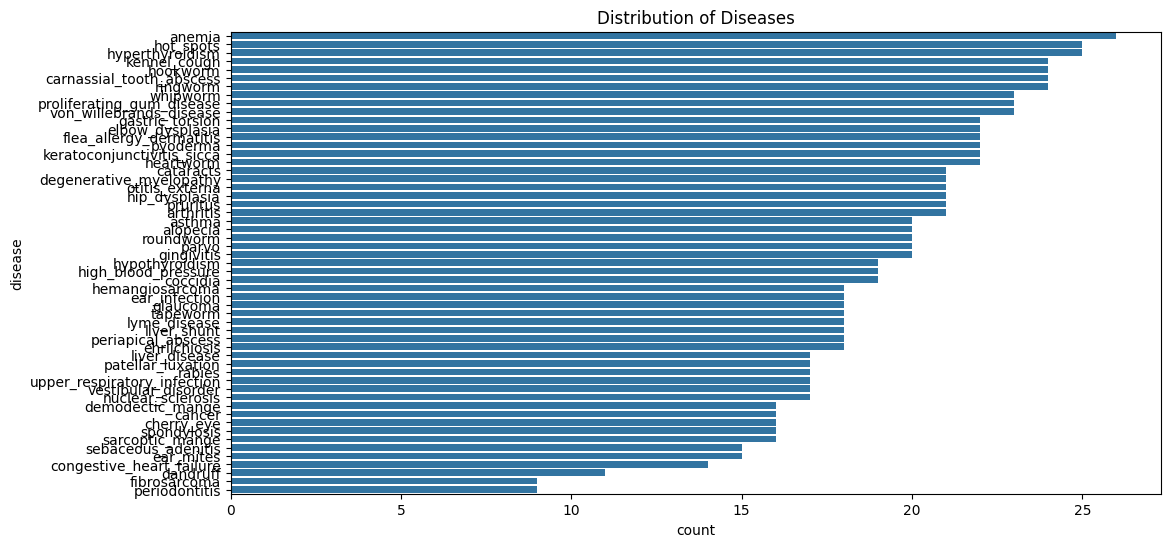

difficulty_breathing    0
lethargy                0
loss_of_appetite        0
hair_loss               0
pallor                  0
limping                 0
muscle_loss             0
unable_to_jump          0
lumps_or_bumps          0
weight_loss             0
swelling                0
discharge_below_eye     0
cloudy_pupils           0
impaired_vision         0
red_thick_bump          0
persistent_diarrhea     0
exercise_intolerance    0
coughing                0
heart_murmur            0
skin_flakes             0
difficulty_walking      0
trembling_hind_legs     0
persistent_itching      0
scabbing                0
hearing_loss            0
inflammation_ear        0
brown_particles_ear     0
fever                   0
sores                   0
nose_bleeds             0
pale_gums               0
favoring_one_leg        0
ulceration              0
severe_itching          0
rash                    0
bloat                   0
empty_retches           0
swollen_midsection      0
bleeding    

In [41]:
# Shape of dataset
print("Shape of data:", df_final.shape)

# Column names
print("Columns:", df_final.columns.tolist())

# Number of diseases
print("Number of unique diseases:", df_final['disease'].nunique())

# Disease distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='disease', data=df_final, order = df_final['disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.show()

# Check for missing values
print(df_final.isnull().sum())


# Preprocessing

### Split into X (features) and y (target):

In [42]:
# Features are all symptoms columns
X = df_final.drop('disease', axis=1)

# Target is the disease
y = df_final['disease']

print(X.shape, y.shape)

(1055, 49) (1055,)


### Split into train and test:

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(844, 49) (211, 49)
(844,) (211,)


In [45]:
print(X_train.head())
print(y_train.head())

     difficulty_breathing  lethargy  loss_of_appetite  hair_loss  pallor  \
321                     1         0                 0          0       0   
758                     0         1                 0          0       1   
442                     0         0                 1          1       1   
362                     0         1                 0          0       1   
377                     1         0                 1          1       0   

     limping  muscle_loss  unable_to_jump  lumps_or_bumps  weight_loss  ...  \
321        0            0               0               1            1  ...   
758        0            0               1               1            0  ...   
442        1            0               1               1            1  ...   
362        1            0               0               1            0  ...   
377        0            0               1               0            1  ...   

     pain  redness_inflammation  vision_loss  cloudiness_in_cornea  

In [46]:
print(y_train.head())


321          ear_mites
758    gastric_torsion
442           coccidia
362           pyoderma
377           dandruff
Name: disease, dtype: object


In [47]:
# 1. Encode y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# 2. Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 3. Find best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"✅ Best Model: {best_model_name}")

# 4. Retrain best model on full data
X_full = pd.concat([X_train, X_test])
y_full_encoded = le.transform(pd.concat([y_train, y_test]))

best_model.fit(X_full, y_full_encoded)


Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 0.7251
KNN Accuracy: 1.0000
SVM Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000
✅ Best Model: Random Forest


RandomForestClassifier(n_estimators=200, random_state=42)

# Build the Machine Learning Model

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
    print("\n" + "="*40 + "\n")

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 7, 0, ..., 0, 0, 0],
 [0, 0, 8, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 3, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 5]]


Decision Tree Accuracy: 0.7251184834123223
Decision Tree Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 5, 0, ..., 0, 0, 0],
 [0, 0, 7, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 2, 0],
 [0, 0, 0, ..., 0, 0, 3]]


KNN Accuracy: 1.0
KNN Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 7, 0, ..., 0, 0, 0],
 [0, 0, 8, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 3, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 5]]


SVM Accuracy: 1.0
SVM Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 7, 0, ..., 0, 0, 0],
 [0, 0, 8, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 3, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 5]]


Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 7, 0, ..., 0, 0, 0],
 [0, 

In [49]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/dog_disease_prediction/models/best_model.pkl')
joblib.dump(le, '/content/drive/MyDrive/dog_disease_prediction/models/label_encoder.pkl')
print("💾 Model and encoder saved!")

💾 Model and encoder saved!


In [52]:
import pandas as pd
import joblib

# Load the trained model
best_model = joblib.load('/content/drive/MyDrive/dog_disease_prediction/models/best_model.pkl')

#Load the LabelEncoder if you saved it separately (optional)
le = joblib.load('/content/drive/MyDrive/dog_disease_prediction/models/label_encoder.pkl')

# Or recreate the label encoder manually if needed (skip for now)

# List of all symptom names (49 total - must match training!)
symptoms = [
'difficulty_breathing', 'lethargy', 'loss_of_appetite', 'hair_loss', 'pallor', 'limping', 'muscle_loss', 'unable_to_jump',
  'lumps_or_bumps', 'weight_loss', 'swelling', 'discharge_below_eye', 'cloudy_pupils', 'impaired_vision', 'red_thick_bump',
  'persistent_diarrhea', 'exercise_intolerance', 'coughing', 'heart_murmur', 'skin_flakes', 'difficulty_walking', 'trembling_hind_legs',
  'persistent_itching', 'scabbing', 'hearing_loss', 'inflammation_ear', 'brown_particles_ear', 'fever', 'sores', 'nose_bleeds', 'pale_gums',
  'favoring_one_leg', 'ulceration', 'severe_itching', 'rash', 'bloat', 'empty_retches', 'swollen_midsection', 'bleeding', 'pain', 'redness_inflammation',
    'vision_loss', 'cloudiness_in_cornea', 'sensitivity_to_light', 'excessive_thirst', 'urination_changes', 'seizures', 'behavioral_changes', 'vomiting'
]

# Ask user input
print("👉 Please answer 0 (No) or 1 (Yes) for each symptom:")
input_data = {}

for symptom in symptoms:
    while True:
        val = input(f"Do you have {symptom.replace('_', ' ')}? (0/1): ")
        if val in ['0', '1']:
            input_data[symptom] = int(val)
            break
        else:
            print("⚠️ Please enter only 0 or 1.")

# Convert input to DataFrame
new_X = pd.DataFrame([input_data])

# Make prediction
predicted_class = best_model.predict(new_X)

# If you have a LabelEncoder to decode back to disease name
# predicted_disease = le.inverse_transform(predicted_class)
# For now just show predicted_class
#print("\n🧠 Predicted Disease Code:", predicted_class[0])

# If you know mapping (you can print list of classes)
predicted_disease = le.inverse_transform(predicted_class)
print("\n🧠 Predicted Disease:", predicted_disease[0])


👉 Please answer 0 (No) or 1 (Yes) for each symptom:
Do you have difficulty breathing? (0/1): 0
Do you have lethargy? (0/1): 0
Do you have loss of appetite? (0/1): 1
Do you have hair loss? (0/1): 0
Do you have pallor? (0/1): 0
Do you have limping? (0/1): 1
Do you have muscle loss? (0/1): 
⚠️ Please enter only 0 or 1.
Do you have muscle loss? (0/1): 0
Do you have unable to jump? (0/1): 1
Do you have lumps or bumps? (0/1): 1
Do you have weight loss? (0/1): 0
Do you have swelling? (0/1): 1
Do you have discharge below eye? (0/1): 0
Do you have cloudy pupils? (0/1): 1
Do you have impaired vision? (0/1): 0
Do you have red thick bump? (0/1): 0
Do you have persistent diarrhea? (0/1): 0
Do you have exercise intolerance? (0/1): 0
Do you have coughing? (0/1): 1
Do you have heart murmur? (0/1): 0
Do you have skin flakes? (0/1): 1
Do you have difficulty walking? (0/1): 0
Do you have trembling hind legs? (0/1): 1
Do you have persistent itching? (0/1): 0
Do you have scabbing? (0/1): 0
Do you have hear